# Decision Trees - Earn $50k

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leer datos y crear el DF

In [2]:
df_raw = pd.read_csv('./adult.data', sep=',')

In [3]:
df_raw.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
df_raw.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df_raw.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [6]:
df_raw.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [7]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
            'capital_gain','capital_loss','hours_per_week','native_country','Earn']

In [8]:
df_raw.columns = col_names
df_raw.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Earn
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Visualización de data

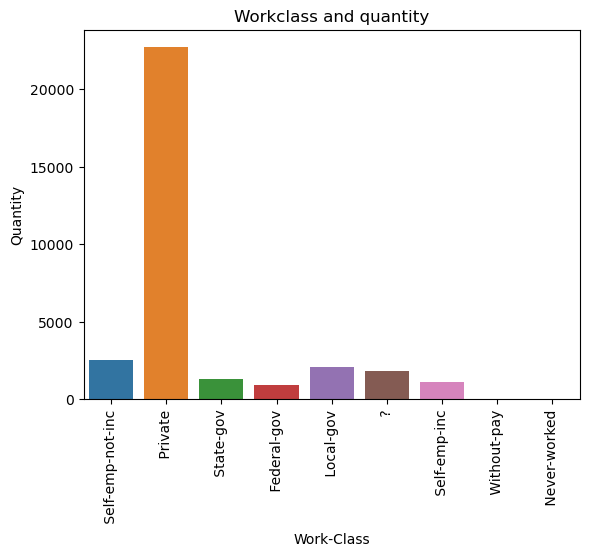

In [14]:
sns.countplot(data=df_raw, x='workclass')
plt.xticks(rotation=90)
plt.xlabel('Work-Class')
plt.ylabel('Quantity')
plt.title('Workclass and quantity')
plt.show()

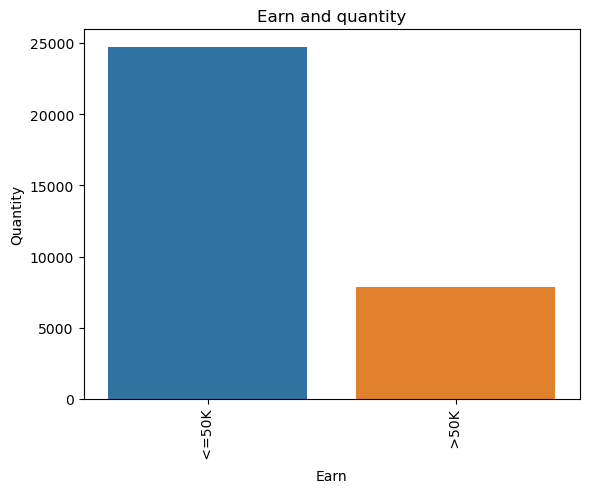

In [15]:
sns.countplot(data=df_raw, x='Earn')
plt.xticks(rotation=90)
plt.xlabel('Earn')
plt.ylabel('Quantity')
plt.title('Earn and quantity')
plt.show()

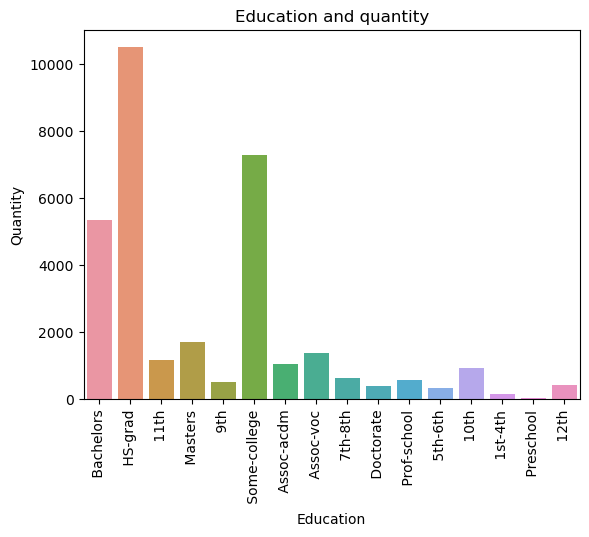

In [16]:
sns.countplot(data=df_raw, x='education')
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.ylabel('Quantity')
plt.title('Education and quantity')
plt.show()

## Codificar los datos

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
df_c = df_raw
oc = OrdinalEncoder()
df_encoded = pd.DataFrame(oc.fit_transform(df_c), columns = df_c.columns)
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Earn
0,33.0,6.0,2925.0,9.0,12.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,12.0,39.0,0.0
1,21.0,4.0,14085.0,11.0,8.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,39.0,39.0,0.0
2,36.0,4.0,15335.0,1.0,6.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,39.0,39.0,0.0
3,11.0,4.0,19354.0,9.0,12.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,39.0,5.0,0.0
4,20.0,4.0,17699.0,12.0,13.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,39.0,39.0,0.0


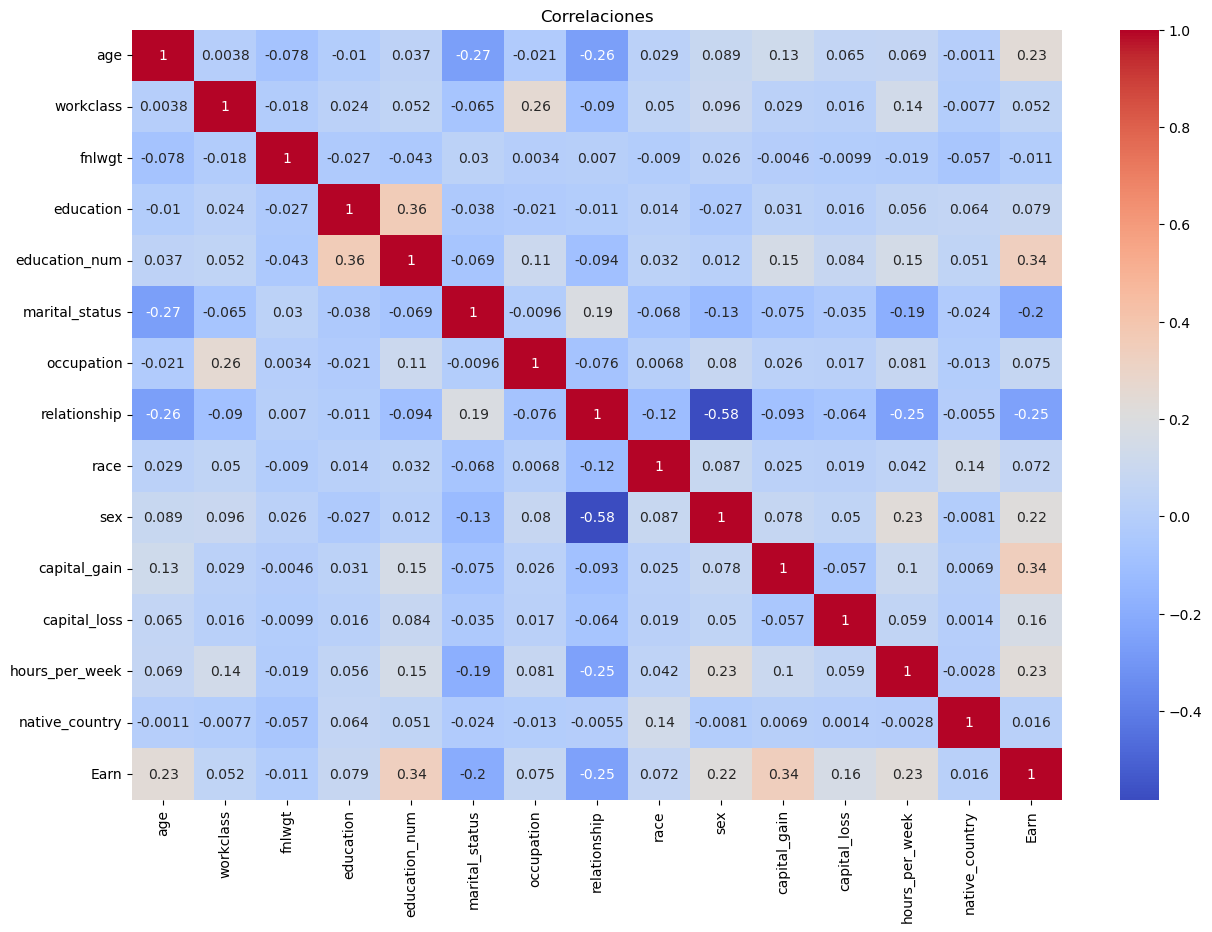

In [21]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones')
plt.show()

In [27]:
X = df_encoded.drop(['Earn','education'], axis=1)
y = df_encoded['Earn']

In [28]:
#oc = OrdinalEncoder()
#X = pd.DataFrame(oc.fit_transform(X), columns = X.columns)
X.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,33.0,6.0,2925.0,12.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,12.0,39.0
1,21.0,4.0,14085.0,8.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,39.0,39.0
2,36.0,4.0,15335.0,6.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,39.0,39.0
3,11.0,4.0,19354.0,12.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,39.0,5.0
4,20.0,4.0,17699.0,13.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,39.0,39.0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [31]:
X_train.shape, X_test.shape

((24420, 13), (8140, 13))

## Modelo de clasificación

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators = 10, random_state=33)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=33)

In [34]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'El accuracy del train es: {train_accuracy}')
print(f'El accuracy del test es: {test_accuracy}')

El accuracy del train es: 0.988001638001638
El accuracy del test es: 0.8502457002457002


In [37]:
feature_score = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_score

fnlwgt            0.166635
age               0.138381
education_num     0.132712
relationship      0.115673
capital_gain      0.109452
hours_per_week    0.080158
marital_status    0.074704
occupation        0.066487
workclass         0.039640
capital_loss      0.034228
native_country    0.017052
race              0.013317
sex               0.011563
dtype: float64

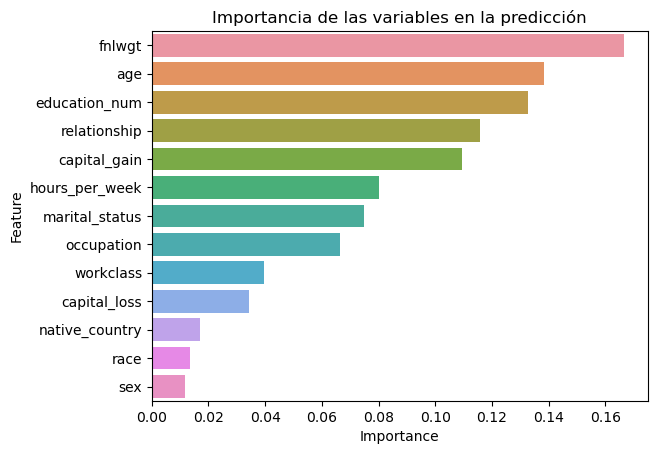

In [38]:
sns.barplot(x=feature_score, y=feature_score.index)
plt.title('Importancia de las variables en la predicción')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_test, y_test_pred)
print('Matriz de confusión: \n\n', cm)

Matriz de confusión: 

 [[5835  409]
 [ 810 1086]]


In [41]:
y.unique()

array([0., 1.])

In [42]:
mas_50 = 0
menos_50 = 0
for _ in y:
    if _ == ' <=50K':
        mas_50 +=1
    else:
        menos_50 +=1

print(f'Más de 50K: {mas_50}')
print(f'Menos de 50K: {menos_50}')

Más de 50K: 0
Menos de 50K: 32560


In [43]:
def prob(mas_50, menos_50):
    p_mas = round(mas_50/(mas_50 + menos_50), 4)*100
    p_menos = 100 - p_mas
    print(f'La probabilidad de ganar más de 50K es: {p_mas} %')
    print(f'La probabilidad de ganar menos de 50K es: {p_menos} %')
    return (p_mas, p_menos)

In [44]:
prob(24719, 7841)

La probabilidad de ganar más de 50K es: 75.92 %
La probabilidad de ganar menos de 50K es: 24.08 %


(75.92, 24.08)